# Исследование данных  
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

# План

- <a>1. Чтение файлов с данными и изучение общей информаций.</a>
- <a>2. Обработка данных. Поиск пропущеных, nan значений и дубликатов. Замена значений на медианы или на средное значение. Слияание датафрэимов</a>
- <a>3. Исследовательский анализ данных. Построение графиков  признаков и ухода клиентов.  </a>
- <a>4. Предварительная обработка данных для обучение моделей. Создание численых признаков и производных признаков от существующих.  </a>
- <a>5. Построение моделей. Подборка гиперпараметров и выбор наилучше модель </a>
- <a>6. Вырвод результатов  </a>



### Шаг 1. Чтение файлов с данными и изучение общей информаций. 

In [1]:
#Импорт библиотек и обработки данных и линейной алгебры
import numpy as np 
import pandas as pd 
#Импорт библиотек визулизаций.
import os
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
# Функция раскрытия информаций датафрэймов
def info_df(df):
    print('Название датафрэйм :', df.name)
    print ("Кол-во наблюдений     : " ,df.shape[0])
    print ("Кол-во признаков : " ,df.shape[1])
    print ("\n Список признаков : \n" ,df.columns.tolist())
    print ("\n Пропущеный наблюдений :  ", df.isnull().sum().values.sum())
    print ("\n Уникальные наблюдений :  \n",df.nunique())
    print("\n")
    print( df.info())
    print("\n")
    print(df.sample(5))


In [3]:
# Ввод данных в датафрейм пандас

contract = pd.read_csv(r"C:\Users\Asus\Documents\Python Scripts\Яндекс практикум\Выпусконой проект\data\contract.csv")

internet = pd.read_csv(r"C:\Users\Asus\Documents\Python Scripts\Яндекс практикум\Выпусконой проект\data\internet.csv")

personal = pd.read_csv(r"C:\Users\Asus\Documents\Python Scripts\Яндекс практикум\Выпусконой проект\data\personal.csv")

phone = pd.read_csv(r"C:\Users\Asus\Documents\Python Scripts\Яндекс практикум\Выпусконой проект\data\phone.csv")

 #Назначение атрибут имия датафрэеймов
contract.name = 'contract'
internet.name = 'internet'
personal.name = 'personal'
phone.name = 'phone'




In [4]:
# Информация контракта
info_df(contract)


Название датафрэйм : contract
Кол-во наблюдений     :  7043
Кол-во признаков :  8

 Список признаков : 
 ['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

 Пропущеный наблюдений :   0

 Уникальные наблюдений :  
 customerID          7043
BeginDate             77
EndDate                5
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


      c

In [5]:
# Информация контракта
info_df(personal)

Название датафрэйм : personal
Кол-во наблюдений     :  7043
Кол-во признаков :  5

 Список признаков : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']

 Пропущеный наблюдений :   0

 Уникальные наблюдений :  
 customerID       7043
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


      customerID  gender  SeniorCitizen Partner Dependents
2515  8869-LIHMK  Female              0      No         No
6618  8404-FYDIB    Male              0      No         No
4724  5073-RZGBK  Female              0     Yes        Yes
4692  0265-PSUAE  Female              0     Yes       

In [6]:
info_df(internet)

Название датафрэйм : internet
Кол-во наблюдений     :  5517
Кол-во признаков :  8

 Список признаков : 
 ['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

 Пропущеный наблюдений :   0

 Уникальные наблюдений :  
 customerID          5517
InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB
None


 

In [7]:
info_df(phone)

Название датафрэйм : phone
Кол-во наблюдений     :  6361
Кол-во признаков :  2

 Список признаков : 
 ['customerID', 'MultipleLines']

 Пропущеный наблюдений :   0

 Уникальные наблюдений :  
 customerID       6361
MultipleLines       2
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB
None


      customerID MultipleLines
3551  9278-VZKCD           Yes
3296  0396-UKGAI            No
4500  7379-FNIUJ            No
447   3957-HHLMR           Yes
3609  8915-NNTRC           Yes


### Вывод

При первычном расмотрение можно отметить что необходимо привести тип данныхв нжную для оработки и построение модели.
Нужно отметить что количество наблюдений в файле "personal" и "contract" одинаковые  -  7043,что наводит на мысль что у каждого клиента хотя бы один контракт заключен, так же количество набдюдений в файле "internet " - 5517  и колличество набдюдений в файле "phone" -6361 


## 2. Обработка данных.
Поиск пропущеных, nan значений и дубликатов.Замена тип данных. Замена значений на медианы или на средное значение. Слияание датафрэимов

In [8]:
# Проверка наличий значение Nan и дупликатов
def duplicate_nan(df):
    nan = df.isna().sum()
    dup = df.duplicated().sum()
    print('Nan',df.name,'\n', nan)
    print('Duplicate:', df.name,'\n', dup)

    #Назначение атрибут имия датафрэеймов
contract.name = 'contract'
internet.name = 'internet'
personal.name = 'personal'
phone.name = 'phone'

for df in (contract, personal, internet, phone):
    duplicate_nan(df)

Nan contract 
 customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
Duplicate: contract 
 0
Nan personal 
 customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
Duplicate: personal 
 0
Nan internet 
 customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
Duplicate: internet 
 0
Nan phone 
 customerID       0
MultipleLines    0
dtype: int64
Duplicate: phone 
 0


In [9]:
# Создание новного признака ухода клиента. 
def list_comp(df):
    return df.assign(churn=['No' if x == 'No' else 'Yes' for x in df['EndDate']])
contract = list_comp(contract)

In [10]:
# Замена  тип данных float
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'],errors='coerce')

# Замена  тип данных datetime
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])

# Замена  тип данных EndDate no в финальной даты базы данных
contract['EndDate'] = contract['EndDate'].replace('No','2020-02-01')

# Замена  тип данных в datetime
contract['EndDate'] = pd.to_datetime(contract['EndDate'])

#Расчет перид обслужтвания клиента
contract['LoyaltyTime'] = contract['EndDate'] - contract['BeginDate']

#Заполнение ппропущеных строк Total Charges
contract['TotalCharges'] = np.where(contract['TotalCharges'].isna() , contract['MonthlyCharges'], contract['TotalCharges'])

contract.shape

#Проверка наличиф NaN знчений
contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
churn               0
LoyaltyTime         0
dtype: int64

In [11]:
# Соединение все датафрэймы в одном 
from functools import reduce; 
telcom = reduce(lambda left,right: pd.merge(left, right, on='customerID', how='left'), [contract,personal, internet,phone])

#Проверка наличия NaN значения в новом датафрэиме
telcom.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
churn                  0
LoyaltyTime            0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

## Вывод

Из количество пропушеных значений следует, что в датафрэйме internet больше прорущеных значений чем в датафрэйме phone.

In [12]:
# Проверка на совпадение клиентов пропущеных в датафрэймах initernet и phone
a = telcom[telcom.MultipleLines.isna()]
b = telcom[telcom.InternetService.isna()]
len(list(set(a.index).intersection(b.index)))

0

In [13]:
# проверка количество MultipleLines клиентов с пропушеными значениями в internet service
telcom[telcom.InternetService.isna()]['MultipleLines'].value_counts()

No     1184
Yes     342
Name: MultipleLines, dtype: int64

In [14]:
# Проверка тип Интернет сервис в Miltiple lines
telcom[telcom.MultipleLines.isna()]['InternetService'].value_counts()

DSL    682
Name: InternetService, dtype: int64

## Вывод
Из анализа следует что из 1526 пропушеных значений в Internet service 1184 не имеют несколько телефонных линий и только 342 имеют несколько, возможно это означает что у этих коиентов только телефон подключен но не интернет сервис, а из за этого отсутвуют в датафрэйме pohone. Так же все клиенты из датафрэйма phone подключены к интернету через dsl, то что означает что имеютхотя бы одну телефоную линию. Из этого следует заполнить пропущеним значением str No

In [15]:
# Проверка пропущеных значений
telcom = telcom.fillna('No')

In [16]:
# Проверка пропущеных значений
telcom.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
churn               0
LoyaltyTime         0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

In [17]:
# Перевод срок клиента в тип float
telcom['LoyaltyTime'] = telcom['LoyaltyTime'] / pd.to_timedelta(1, unit='D')

telcom.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
churn               7043 non-null object
LoyaltyTime         7043 non-null float64
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
MultipleLines 

## 3. Исследовательский анализ данных. 
Построение графиков  признаков и ухода клиентов. 

In [18]:
#Разделение клиентов на ушедших и оствашихся
# churn = ушедшшие клиенты
# not_churn = отставшишейся клиенты

churn     = telcom[telcom["churn"] == "Yes"]
not_churn = telcom[telcom["churn"] == "No"]

#Разделение численые и категориальные признаки
Id_col     = ['customerID']
target_col = ["churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

In [19]:
# Уникальные значения 
lab = telcom["churn"].value_counts().keys().tolist()
#Значения 
val = telcom["churn"].value_counts().values.tolist()

#Соотнощение ушедших и оставшихся клиентов 
#yes - ушли
#no - не ушли

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Cоотношение ушедших и оставшихся клиентов ",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [20]:
#Функция построения графиков по категорялтным  признакам
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Not churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Not churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)




#Цикл применения для всех категоряльных признаков
for i in cat_cols :
    plot_pie(i)





In [21]:
#Функция построения гистограм численых признаков
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    

#Цикл для всех численых признаков   
for i in num_cols :
    histogram(i)

## Вывод

Из графиков можно проследить некоторую тенденцию ушедщих клиентов при небольшой суммарной оплате и недолгое вступление в силу контракта. То есть новые клиенты чаше всего отказваются


## 4. Предварительная обработка данных для обучение моделей. 
Создание численых признаков и производных признаков от существующих.

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

telcom = telcom.drop(['BeginDate','EndDate'], axis = 1)
df_CatBoost = telcom.copy() 

#Признак customer id 
Id_col     = ['customerID']
#Целовой признак
target_col = ['churn']
#Категорияльные признаки
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#Численые признаки
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]
#Бинарные признаки (да, нет)
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Признаки с боле чес 2 категории
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Encoding бинарных признаков
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Дублирование гатегориальныхпризнаков
telcom = pd.get_dummies(data = telcom,columns = multi_cols )

#Масштавирование численых признаков
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#удаление оригинальных признаков и соединение масщтавированых признаком с думмы признаками
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [23]:
telcom.shape

(7043, 27)

In [24]:
# Полученые признаки со статистическими значениями 
summary = (df_telcom_og[[i for i in df_telcom_og.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [25]:
#Корреляция 
correlation = telcom.corr()
#Матрица корреляций 
matrix_cols = correlation.columns.tolist()

corr_array  = np.array(correlation)

#Построение графика кореляция 
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X = telcom[[i for i in telcom.columns if i not in Id_col + target_col]]
Y = telcom[target_col + Id_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
pca_data["churn"] = pca_data["churn"].replace({1:"Churn",0:"Not Churn"})

def pca_scatter(target,color) :
    tracer = go.Scatter(x = pca_data[pca_data["churn"] == target]["PC1"] ,
                        y = pca_data[pca_data["churn"] == target]["PC2"],
                        name = target,mode = "markers",
                        marker = dict(color = color,
                                      line = dict(width = .5),
                                      symbol =  "diamond-open"),
                        text = ("Customer Id : " + 
                                pca_data[pca_data["churn"] == target]['customerID'])
                       )
    return tracer

layout = go.Layout(dict(title = "Visualising data with principal components",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 1",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 2",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 600
                       )
                  )
trace1 = pca_scatter("Churn",'red')
trace2 = pca_scatter("Not Churn",'royalblue')
data = [trace2,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [27]:
#Разделение признаков
bi_cs = telcom.nunique()[telcom.nunique() == 2].keys()
dat_rad = telcom[bi_cs]

#Построение  radar chart для клиентов
def plot_radar(df,aggregate,title) :
    data_frame = df[df["churn"] == aggregate] 
    data_frame_x = data_frame[bi_cs].sum().reset_index()
    data_frame_x.columns  = ["feature","yes"]
    data_frame_x["no"]    = data_frame.shape[0]  - data_frame_x["yes"]
    data_frame_x  = data_frame_x[data_frame_x["feature"] != "churn"]
    
    #Счет 1's(yes)
    trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 1's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            )
    #Счет 0's(No)
    trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 0's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            ) 
    layout = go.Layout(dict(polar = dict(radialaxis = dict(visible = True,
                                                           side = "counterclockwise",
                                                           showline = True,
                                                           linewidth = 2,
                                                           tickwidth = 2,
                                                           gridcolor = "white",
                                                           gridwidth = 2),
                                         angularaxis = dict(tickfont = dict(size = 10),
                                                            layer = "below traces"
                                                           ),
                                         bgcolor  = "rgb(243,243,243)",
                                        ),
                            paper_bgcolor = "rgb(243,243,243)",
                            title = title,height = 700))
    
    data = [trace2,trace1]
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

#plot
plot_radar(dat_rad,1,"Churn -  Customers")
plot_radar(dat_rad,0,"Non Churn - Customers")

# 5. Построение моделей. 

Подборка гиперпараметров и выбор наилучше модель <

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

In [29]:
# Разделение датасет на train, valid, test
X = telcom.drop(['churn','customerID'], 1)
y = telcom['churn']

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, shuffle = False)

X_train, X_valid, y_train, y_valid= train_test_split(X_train, y_train, test_size = 0.25, shuffle = False)

print(X_train.shape, X_test.shape, X_valid.shape)

(4225, 25) (1409, 25) (1409, 25)


In [30]:
# Обучение модели с дефолтными значениями

classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['Neural Network :', MLPClassifier()],
               ['LogisticRegression :', LogisticRegression()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]
              ]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_valid

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_valid)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_valid, predictions))
    print('Roc_auc score: ', roc_auc_score(y_valid, predictions),'\n')

DecisionTree : 0.7374024130589071
Roc_auc score:  0.6644970610276462 

RandomForest : 0.7906316536550745
Roc_auc score:  0.6804600396621073 

Naive Bayes : 0.7423704755145494
Roc_auc score:  0.7509316516871689 

KNeighbours : 0.7679205110007097
Roc_auc score:  0.6870759136813879 

SVM : 0.7877927608232789
Roc_auc score:  0.6809787568121455 

Neural Network : 0.7828246983676366
Roc_auc score:  0.6989439581559669 

LogisticRegression : 0.8041163946061036
Roc_auc score:  0.7225921073425879 

ExtraTreesClassifier : 0.7700496806245565
Roc_auc score:  0.6614089734243489 

AdaBoostClassifier : 0.8254080908445706
Roc_auc score:  0.7380198004659533 

GradientBoostingClassifier:  0.836763662171753
Roc_auc score:  0.7507417527796612 

CatBoost : 0.8474095102909865
Roc_auc score:  0.7695532150267389 



In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score , make_scorer

# Функция GridSearch пойска гиперпараметров
def search_best_param(estimator, params):
    
    model= estimator(random_state=1234)
    
    
    
    model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
    
    model1.fit(X_train,y_train)
    
    print("Best Hyper Parameters:",model1.best_params_)
    
    prediction=model1.predict(X_train)
    

    
    print("Accuracy train:",accuracy_score(prediction,y_train))

    print('Roc_auc score train: ', roc_auc_score(y_train, prediction))
    
    print("Confusion Metrix:\n",confusion_matrix(prediction,y_train))
    return model1.best_params_
    



In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold


 # Функция валидация резултатов модель и найлучшеми параметрами   
def churn_prediction(estimator,training_x,validation_x,
                             training_y,validation_y) :
    
    #model
    estimator.fit(training_x,training_y)
    predictions   = estimator.predict(validation_x)
    probabilities = estimator.predict_proba(validation_x)
    accuracy = accuracy_score(validation_y,predictions) 
     #roc_auc_score
    model_roc_auc = roc_auc_score(validation_y,predictions)
    print (estimator)
    print ("\n Classification report : \n",classification_report(validation_y,predictions))
    print ("Accuracy   Score :{:.3f} \n Area under curve :{:.3f}".format(accuracy, model_roc_auc ))
    
    #confusion matrix
    conf_matrix = confusion_matrix(validation_y,predictions)
    
   
    return  accuracy, model_roc_auc
    




## Decision Tree Classifier

In [33]:
# Поиск гиперпараметров Decision Tree Clasiffier
params_dt = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
             'max_depth': [10,50,100,500],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123],
            'class_weight': ['balanced']}

best_dt_params =  search_best_param(DecisionTreeClassifier, params_dt)

Best Hyper Parameters: {'class_weight': 'balanced', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 123}
Accuracy train: 0.9995266272189349
Roc_auc score train:  0.9996793844180828
Confusion Metrix:
 [[3117    0]
 [   2 1106]]


## Logistic Regression Classifier

In [34]:
 #Поиск гипермараметров Logistic Regresion Classifier
params_logit = {
               'max_iter': [10,50,100,500],
               'class_weight': ['balanced'],
               'solver': ['newton-cg', 'liblinear', 'sag', 'saga'], 
               'multi_class':['auto', 'ovr'],
          'random_state':[123]}

best_logit_params =  search_best_param(LogisticRegression, params_logit)


Best Hyper Parameters: {'class_weight': 'balanced', 'max_iter': 10, 'multi_class': 'auto', 'random_state': 123, 'solver': 'sag'}
Accuracy train: 0.7375147928994082
Roc_auc score train:  0.7723256862941767
Confusion Metrix:
 [[2181  171]
 [ 938  935]]


## Ada Boost Classifier

In [35]:
 #Поиск гипермараметров Ada Boost Classifier
params_ada = {
               'n_estimators': [10,50,100,500,1000],
               'learning_rate': [0.1,0.25,0.5,1,2],
               'algorithm': ['SAMME', 'SAMME.R'], 
               'random_state':[123]}

best_ada_params =  search_best_param(AdaBoostClassifier, params_ada)

Best Hyper Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 1000, 'random_state': 123}
Accuracy train: 0.8714792899408283
Roc_auc score train:  0.804413769192727
Confusion Metrix:
 [[2948  372]
 [ 171  734]]


## Random Forest Classifier

In [36]:
 #Поиск гипермараметров Random forest Classifier
from  sklearn.ensemble import RandomForestClassifier
params_rfc = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [10,50,100,500],
              'n_estimators': [10,50,100,],
              'random_state':[123],
              'class_weight': ['balanced']}


best_rfc_params =  search_best_param(RandomForestClassifier, params_rfc)


Best Hyper Parameters: {'class_weight': 'balanced', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 123}
Accuracy train: 0.9995266272189349
Roc_auc score train:  0.9996793844180828
Confusion Metrix:
 [[3117    0]
 [   2 1106]]


# Churn prediciotn

In [37]:
# Обучение модели с найлучими параметрами и вывод результатов в валидацоном датасете

dt_model = DecisionTreeClassifier(random_state = 123, min_samples_split = 9, min_samples_leaf = 4, max_features = 'log2', 
                           max_depth = 10, class_weight = 'balanced')

logit_model  = LogisticRegression(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='auto', n_jobs=1,
          penalty='l2', random_state=123, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

rfc_model = RandomForestClassifier(max_features = 'auto' ,  max_depth =  50  , n_estimators =100 ,
                             random_state = 123, class_weight = 'balanced' )


adaBoost_model  = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate= 1, n_estimators = 1000, random_state = 123)

NaiveBayes =  GaussianNB()

CatBoost =  CatBoostClassifier(logging_level='Silent')


models = [dt_model,  logit_model, rfc_model, adaBoost_model, CatBoost,  NaiveBayes]
accuracy_valid =[]
auc_valid = []
for model in models:
    accuracy, auc = churn_prediction(model ,X_train,X_valid,y_train,y_valid)
    accuracy_valid.append(accuracy)
    auc_valid.append(auc)
    


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.78      0.82      1027
           1       0.54      0.71      0.61       382

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409

Accuracy   Score :0.758 
 Area under curve :0.743
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10, multi_class='au

In [38]:
# Резултат каждой модели при балансировке признаков 
result_valid = pd.DataFrame(data = [accuracy_valid, auc_valid],  columns = ['DT','LR','RFC', 'AdaB', 'CatB', 'NaiveB']
                            ,index = ['accuracy', 'auc_roc']).T
result_valid


,accuracy,auc_roc
DT,0.757984,0.742735
LR,0.732434,0.751514
RFC,0.814762,0.721674
AdaB,0.852378,0.785292
CatB,0.847410,0.769553
NaiveB,0.742370,0.750932


In [39]:
from sklearn.utils import shuffle
# Функция для увеличение выборки
def upsample(features, target, repeat):
    X_zeros = features[target == 0]
    X_ones = features[target == 1]
    y_zeros = target[target == 0]
    y_ones = target[target == 1]

    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    
    X_upsampled, y_upsampled = shuffle(
        X_upsampled, y_upsampled, random_state=12345)
    
    return X_upsampled, y_upsampled

#Применение функции увеличения выборки к датафрейму без категориальными признаками
X_upsampled, y_upsampled = upsample(X_train, y_train, 10)

In [40]:
accuracy_ups =[]
auc_roc_ups = []

for model in models:
    accuracy_up, auc_up = churn_prediction(model ,X_upsampled,X_valid,y_upsampled,y_valid)
    accuracy_ups.append(accuracy_up)
    auc_roc_ups.append(auc_up)


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      1027
           1       0.51      0.66      0.57       382

    accuracy                           0.73      1409
   macro avg       0.68      0.71      0.69      1409
weighted avg       0.76      0.73      0.74      1409

Accuracy   Score :0.733 
 Area under curve :0.712
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10, multi_class='au

In [41]:
# Результаты с увеличеной выборкой
result_upsampled = pd.DataFrame(data = [accuracy_ups, auc_roc_ups], index = ['accuracy_ups','auc_ups'],
                                columns =  ['DT','LR','RFC', 'AdaB', 'CatB', 'NaiveB'] ).T
result_upsampled

,accuracy_ups,auc_ups
DT,0.733144,0.711721
LR,0.750887,0.755130
RFC,0.784954,0.733286
AdaB,0.681334,0.750164
CatB,0.775727,0.796009
NaiveB,0.704755,0.731705


In [42]:
# Функция для уменьшения выборки 
def downsample(features, target, fraction):
    X_zeros = features[target == 0]
    X_ones = features[target == 1]
    y_zeros = target[target == 0]
    y_ones = target[target == 1]

    X_downsampled = pd.concat(
        [X_zeros.sample(frac=fraction, random_state=12345)] + [X_ones])
    y_downsampled = pd.concat(
        [y_zeros.sample(frac=fraction, random_state=12345)] + [y_ones])
    
    X_downsampled, y_downsampled = shuffle(
        X_downsampled, y_downsampled, random_state=12345)
    
    return X_downsampled, y_downsampled

In [43]:
# Применение функций уменьшения вывборки к датафрэйму без категориальных прризнаков
X_downsampled, y_downsampled = downsample(X_train, y_train, 0.8)

In [44]:
accuracy_downs =[]
auc_roc_downs = []

for model in models:
    accuracy_down, auc_down= churn_prediction(model ,X_downsampled,X_valid,y_downsampled,y_valid)
    accuracy_downs.append(accuracy_down)
    auc_roc_downs.append(auc_down)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.72      0.79      1027
           1       0.49      0.72      0.58       382

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.72      0.73      1409

Accuracy   Score :0.720 
 Area under curve :0.720
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10, multi_class='au

In [45]:
#Результаты с уменьшеной выборкрй
result_downsampled = pd.DataFrame(data = [accuracy_downs, auc_roc_downs], index = ['accuracy_down','auc_down'],
                                columns =  ['DT','LR','RFC', 'AdaB', 'CatB', 'NaiveB'] ).T
result_downsampled

,accuracy_down,auc_down
DT,0.719659,0.719733
LR,0.748048,0.755649
RFC,0.806955,0.731938
AdaB,0.840312,0.790168
CatB,0.840312,0.777015
NaiveB,0.735983,0.746550


In [46]:
# Рещултат каждой модели 
results = reduce(lambda left,right: pd.merge(left, right, left_index=True, right_index=True, how='left'),
                [result_valid, result_upsampled, result_downsampled])

results

,accuracy,auc_roc,accuracy_ups,auc_ups,accuracy_down,auc_down
DT,0.757984,0.742735,0.733144,0.711721,0.719659,0.719733
LR,0.732434,0.751514,0.750887,0.755130,0.748048,0.755649
RFC,0.814762,0.721674,0.784954,0.733286,0.806955,0.731938
AdaB,0.852378,0.785292,0.681334,0.750164,0.840312,0.790168
CatB,0.847410,0.769553,0.775727,0.796009,0.840312,0.777015
NaiveB,0.742370,0.750932,0.704755,0.731705,0.735983,0.746550


In [48]:


best_index = pd.DataFrame(results[['auc_roc', 'auc_ups', 'auc_down']].idxmax(axis=1), columns = ['method'])

best_values = pd.DataFrame(results[['auc_roc', 'auc_ups', 'auc_down']].max(axis=1), columns = ['auc_roc_score'])

best_results = pd.merge(best_index, best_values, left_index =True, right_index = True, how = 'left')                         

In [49]:
# Наилучше результаты каждой модели на валидационой выборке
best_results

,method,auc_roc_score
DT,auc_roc,0.742735
LR,auc_down,0.755649
RFC,auc_ups,0.733286
AdaB,auc_down,0.790168
CatB,auc_ups,0.796009
NaiveB,auc_roc,0.750932


## Вывод

В результате подбора гипермаркетов и увеличения и уменьшения выборки, модел CatBoostCassifier со значенисми по дефолту и с увеличеной выборки показал наилуче скор ROC_AUC 0.796


# 6. Тестирование модели

0    0.605394
1    0.394606
dtype: float64
0.7835344215755855
0.7979666452199312
0.6744930629669157


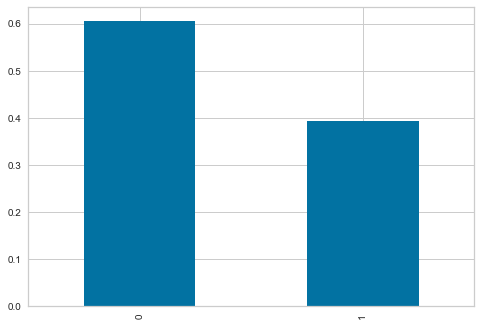

In [149]:
# Тестируем модель случайого леса на выборке тест
CatBoost_tuned =  CatBoost =  CatBoostClassifier(logging_level='Silent')
CatBoost_tuned.fit(X_upsampled, y_upsampled)

# Спрогнозуремый модели значени
predicted_test = pd.Series(CatBoost_tuned.predict(X_test))

# Частота классов
class_frequency_model = predicted_test.value_counts(normalize = True) 


print(class_frequency_model)

class_frequency_model.plot(kind = 'bar')

# Значения метрики качество модели при выбоаной модели
print('Accuracy score',accuracy_score(y_test, predicted_test))
print('Roc_auc score',roc_auc_score(y_test, predicted_test))
print('F1 score', f1_score(y_test, predicted_test))

In [151]:
# Нулевой массив 
target_pred_constant_test = pd.Series([0]*len(y_test))

print(accuracy_score(y_test, target_pred_constant_test))

len(target_pred_constant_test)

0.7295954577714692


1409

In [183]:
# Функция обучения и вывод резултата на тестовой выборке 
def churn_report(estimator,training_x,test_x,
                             training_y,test_y,cf) :
    
    #model
    estimator.fit(training_x,training_y)
    predictions   = estimator.predict(test_x)
    probabilities = estimator.predict_proba(test_x)
    #confusion matrix
    conf_matrix = confusion_matrix(test_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(test_y,predictions)
    
    
    print (estimator)
    print ("\n Classification report : \n",classification_report(test_y,predictions))
    print ("Confusion matrix: \n",conf_matrix)
    print('Acuraccy score:\n', accuracy_score(y_test, predictions))
    print ("Area under curve : ",model_roc_auc,"\n")
    

In [184]:
cols    = [i for i in telcom.columns if i not in Id_col + target_col]

final_report = churn_report(CatBoost_tuned,X_upsampled, X_test, y_upsampled,y_test, cols, 
                              )


 Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      1028
           1       0.57      0.83      0.67       381

    accuracy                           0.78      1409
   macro avg       0.75      0.80      0.76      1409
weighted avg       0.83      0.78      0.79      1409

Confusion matrix: 
 [[788 240]
 [ 65 316]]
Acuraccy score:
 0.7835344215755855
Area under curve :  0.7979666452199312 



# Вывод

Достигнутое значение ROC_AUC при тестовой выборке сотавляет 0,797, что превыщает на 0,068 чем значении при нулевой массив. Это говорит о том что модель адвекватен.

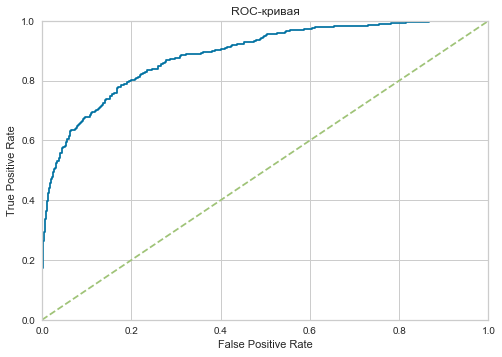

0.8871876180847044


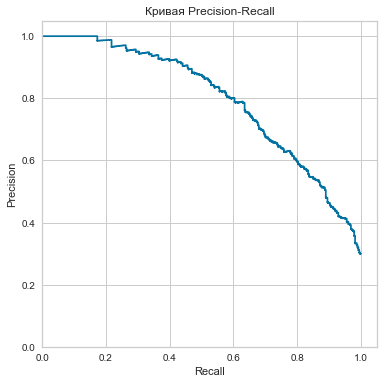

In [185]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# Строение криво ROC
probabilities_test = CatBoost_tuned.predict_proba(X_test)
probabilities_one_test = probabilities_test[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

auc_roc =  roc_auc_score(y_test, probabilities_one_test)

print(auc_roc)


fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test)
precision, recall, thresholds = precision_recall_curve(y_test, probabilities_test[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Кривая Precision-Recall')
plt.show()


## Вывод

Площадь под крривой больше чем 0,5 то есть положителная, и кривая достаточно различается от случайного резултата, то что свидительствует о качество выбраной модели

Кривая Точность-полнота показвает оптимистичная картина, то что может быть связано с маленким количеством наблюдений

## В отчёте ответьте на вопросы:
- <a>1. Какие пункты плана были выполнены, а какие — нет (поясните почему)? <br> <br>
    
    <font color='black'>
    Все пункты планы были выполнены. Наверно в план нужно было включить еще пункт с дата инженеринг. <br> <br>
    
- <a>2. Какие трудности возникли и как вы их преодолели? <br> <br>
    <font color='black'>
    Трудности были связаны с выором подхода и модели для обучения. Остановился на GridSearch потому что датачет не большой и обучение занимало не так много времени. Но прежде чем выбрать поэспериментировал c кросс валидация и бутсрпа. <br> <br>
    
- <a>3. Какие ключевые шаги в решении задачи выделили?<br> <br>
     <font color='black'>
    Ключевые шаги для решения были обработка даных, их изучение, и понять как все данные сляить в одном при этом не потерять или удалять клиентов, так как датасет маленький каждый из них несет ценную информацию<br>
    
- <a>4. Какая ваша итоговая модель и какое у неё качество?<br> <br>
     <font color='black'>
    Итоговая модель получил CatBoostClassifier c дкфольтными параметрами обучен при увеличоной выборка. Метрики которые получил:
    Accuracy Score 0.78
    AUC_roc : 0.797
    Confusion Matrix
    [[788 240]
    [ 65 316]]<br>
    
- <a>5. На что обращает внимание тимлид, проверяя проект:<br> <br>
     <font color='black'>
    Обрашал внимание на то что нужно улучшить метрику и обратит внимание на confusion matrix. Еще предложил  разделить клиентов на две групп: короткие договора  и с длинным договором.<br> <br>
         <font color='black'>
         Нужно довести анализ "полноты" и "точности" из Confusion Metrix для улучшения качество .<br><br>
Были предложены тимлидом след. шаги для улучшения метрики: 
<br><br>
1) Искать факторы (фичи),которые влияют на бизнес: собирать новые, генерировать на имеющихся данных. Возожно ещё ввести кластеры клиентов <br><br>
2) Пробовать разные модели: от простых до сложных
3) Подбирать параметры самих моделей: с помощью автоматического перебора, или на основе опыта через GridSeach 
<br><br>
    
- <a>6. Ответили на все вопросы или нет?<br><br>
     <font color='black'>
         Думаю что, да! <br/><br/>
